## Importações

In [1950]:
%matplotlib inline

import sys
import lumapi
import os
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from scipy.constants import c


In [1951]:
inter = lumapi.INTERCONNECT()

## Definindo constantes

In [1952]:
um = 1e-6
nm = 1e-9

In [1953]:
lamb = 1550*nm
neff = 2.353696366632936

In [1954]:
def cria_dc(name,coef, x, y):
    inter.addelement('Waveguide Coupler')
    inter.set("name", name)
    inter.set("coupling coefficient 1",coef)
    inter.setposition(name,x,y)

def cria_guia(name,length,neff,ng,x,y):
    inter.addelement('Straight waveguide')
    inter.set("name", name)
    inter.set("length",length)
    inter.set("effective index 1", neff)
    inter.set("group index 1", ng)
    inter.setposition(name,x,y)


def cria_dc_PDK(name,length, x, y):
    inter.addelement('ebeam_dc_te1550')
    inter.set("name", name)
    inter.set("coupling_length",length)
    inter.setposition(name,x,y)

def cria_guia_PDK(name,annotate,length,width,x,y):
    inter.addelement('ebeam_wg_integral_1550')
    inter.set("name", name)
    inter.set("annotate", annotate)
    inter.set("wg_length",length)
    inter.set("wg_width", width)
    inter.setposition(name,x,y)


In [1964]:
print(delta_shift*1e6)

0.6585386381920375


## Definindo o estágio/caso/espaçamento que será realizado

In [1955]:

inter.switchtodesign()
inter.deleteall()

guia_menor = 50*um

#CASO:
# 1 - ideal
# 2 - real
# 3 - pdk
caso = 3
CASO =['IDEAL', 'REAL', 'PDK']
CASO = CASO[caso-1]

#INDICE:
#delta_L[0] 50 GHz - indice [0]
#delta_L[1] 100 GHz - indice [1]
#delta_L[2] 200 GHz - indice [2]

indice = 0

#ESTAGIO:
#1 - estagio [0]
#2 - estagio [1]
#3 - estagio [2]
estagio = 2

ESTAGIO = [1,2,3]

F = [50,100,200]
F = F[indice]

delta_L = np.array([1351.33061417,  675.66530709,  337.83265354])*0.5* um
delta_L_05 = delta_L[indice]*0.5
delta_L_025 = delta_L[indice]*0.25
delta_L_2 = delta_L[indice]*2
delta_L = delta_L[indice]

delta_shift = lamb/neff

ordem = 2

In [1956]:

lamb_ini = 1530
lamb_fin = 1565
inter.addelement('Optical Network Analyzer')
inter.set("number of points",1000)
inter.set("input parameter",2)
inter.set("number of input ports", 2**(estagio+1))
inter.set("start frequency", c/(lamb_ini*nm))
inter.set("stop frequency", c/(lamb_fin*nm))

if (caso == 1):

    cria_dc("WC1", 0.5, -200,250)
    cria_dc("WC2", 0.08, 200,250)
    cria_dc("WC30", 0.29, 0,250)
    cria_guia("Guia_1",guia_menor + delta_L,2.354,4.33683,-100,175)
    cria_guia("Guia_2",guia_menor,2.354,4.33683,-100,325)
    cria_guia("Guia_30",guia_menor + delta_L_2,2.354,4.33683,100,325)
    cria_guia("Guia_31",guia_menor,2.354,4.33683,100,175)

    if(estagio == 1 or estagio ==2):

        cria_dc("WC3", 0.08, 800,450)
        cria_dc("WC4", 0.08, 800,-50)
        cria_dc("WC5", 0.5, 400,-50)
        cria_dc("WC6", 0.5, 400,450)
        cria_dc("WC31", 0.29, 600,-50)
        cria_dc("WC32", 0.29, 600,450)

        cria_guia("Guia_3", guia_menor + delta_L_05 + 0.75*delta_shift, 2.35400, 4.33683, 500, 400)
        cria_guia("Guia_4", guia_menor, 2.35400, 4.33683, 500, 500)
        cria_guia("Guia_5", guia_menor, 2.35400, 4.33683, 500, 0)
        cria_guia("Guia_6", guia_menor + delta_L_05, 2.35400, 4.33683, 500, -100)
        cria_guia("Guia_32", guia_menor, 2.35400, 4.33683, 700, 400)
        cria_guia("Guia_33", guia_menor + 2*(delta_L_05 + 0.75*delta_shift), 2.35400, 4.33683, 700, 500)
        cria_guia("Guia_34", guia_menor + 2*delta_L_05, 2.35400, 4.33683, 700, 0)
        cria_guia("Guia_35", guia_menor, 2.35400, 4.33683, 700, -100)

    if(estagio == 2):

        cria_dc("WC7", 0.08, 1400, -900)
        cria_dc("WC8", 0.5, 1000, -900)
        cria_dc("WC9", 0.08, 1400, -500)
        cria_dc("WC10", 0.5, 1000, -500)
        cria_dc("WC11", 0.08, 1400, 700)
        cria_dc("WC12", 0.5, 1000, 700)
        cria_dc("WC13", 0.08, 1400, 1000)
        cria_dc("WC14", 0.5, 1000, 1000)
        cria_dc("WC33", 0.29, 1200, -900)
        cria_dc("WC34", 0.29, 1200, -500)
        cria_dc("WC35", 0.29, 1200, 700)
        cria_dc("WC36", 0.29, 1200, 1000)

        cria_guia("Guia_7", guia_menor + delta_L_025, 2.35400, 4.33683, 1100, -950)
        cria_guia("Guia_8", guia_menor, 2.35400, 4.33683, 1100, -850)
        cria_guia("Guia_9", guia_menor + delta_L_025 + 0.25*delta_shift, 2.35400, 4.33683, 1100, -550)
        cria_guia("Guia_10", guia_menor, 2.35400, 4.33683, 1100, -450)
        cria_guia("Guia_11", guia_menor, 2.35400, 4.33683, 1100, 750)
        cria_guia("Guia_12", guia_menor + delta_L_025 + 0.125*delta_shift, 2.35400, 4.33683, 1100, 650)
        cria_guia("Guia_13", guia_menor, 2.35400, 4.33683, 1100, 1050)
        cria_guia("Guia_14", guia_menor + delta_L_025 + 0.375*delta_shift, 2.35400, 4.33683, 1100, 950)
        
        cria_guia("Guia_36", guia_menor, 2.35400, 4.33683, 1300, -950)
        cria_guia("Guia_37", guia_menor + 2*delta_L_025, 2.35400, 4.33683, 1300, -850)
        cria_guia("Guia_38", guia_menor, 2.35400, 4.33683, 1300, -550)
        cria_guia("Guia_39", guia_menor + 2*(delta_L_025 + 0.25*delta_shift), 2.35400, 4.33683, 1300, -450)
        cria_guia("Guia_40", guia_menor + 2*(delta_L_025 + 0.125*delta_shift), 2.35400, 4.33683, 1300, 750)
        cria_guia("Guia_41", guia_menor, 2.35400, 4.33683, 1300, 650)
        cria_guia("Guia_42", guia_menor + 2*(delta_L_025 + 0.375*delta_shift), 2.35400, 4.33683, 1300, 1050)
        cria_guia("Guia_43", guia_menor, 2.35400, 4.33683, 1300, 950)

elif (caso == 3):

    if(ordem == 1):
        cria_dc_PDK("WC1", 17.5*um,-200,250)
        cria_dc_PDK("WC2",17.5*um,200,250)
        cria_dc_PDK("WC30", 0*um,0,250)

        cria_guia_PDK("Guia_1", False, guia_menor + delta_L, 500e-9, -100, 175)
        cria_guia_PDK("Guia_2", False, guia_menor, 500e-9, -100, 325)
        cria_guia_PDK("Guia_30", False, 0, 500e-9, 100, 325)
        cria_guia_PDK("Guia_31", False, 0, 500e-9, 100, 175)
    if(ordem ==2):
        cria_dc_PDK("WC1", 17.5*um,-200,250)
        cria_dc_PDK("WC2",7.5*um,200,250)
        cria_dc_PDK("WC30", 10*um,0,250)


        cria_guia_PDK("Guia_1", False, guia_menor + delta_L, 500e-9, -100, 175)
        cria_guia_PDK("Guia_2", False, guia_menor, 500e-9, -100, 325)
        cria_guia_PDK("Guia_30", False, guia_menor + 2*delta_L, 500e-9, 100, 325)
        cria_guia_PDK("Guia_31", False, guia_menor, 500e-9, 100, 175)
    if(estagio == 1 or estagio ==2):
        if(ordem ==2):
            cria_dc_PDK("WC3", 8*um, 800, 450)
            cria_dc_PDK("WC4", 7.5*um, 800, -50)
            cria_dc_PDK("WC5", 17.5*um, 400, -50)
            cria_dc_PDK("WC6", 17.5*um, 400, 450)
            cria_dc_PDK("WC31", 10*um, 600, -50)
            cria_dc_PDK("WC32", 10*um, 600, 450)

            cria_guia_PDK("Guia_3", False, guia_menor + delta_L_05 + 0.75*delta_shift, 500e-9, 500, 400)
            cria_guia_PDK("Guia_4", False, guia_menor, 500e-9, 500, 500)
            cria_guia_PDK("Guia_5", False, guia_menor, 500e-9, 500, 0)
            cria_guia_PDK("Guia_6", False, guia_menor + delta_L_05, 500e-9, 500, -100)
            cria_guia_PDK("Guia_32", False, guia_menor, 500e-9, 700, 400)
            cria_guia_PDK("Guia_33", False, guia_menor + 2*(delta_L_05 + 0.75*delta_shift), 500e-9, 700, 500)
            cria_guia_PDK("Guia_34", False, guia_menor + 2*delta_L_05, 500e-9, 700, 0)
            cria_guia_PDK("Guia_35", False, guia_menor, 500e-9, 700, -100)
        if (ordem == 1):
            cria_dc_PDK("WC3", 17.5*um, 800, 450)
            cria_dc_PDK("WC4", 17.5*um, 800, -50)
            cria_dc_PDK("WC5", 17.5*um, 400, -50)
            cria_dc_PDK("WC6", 17.5*um, 400, 450)
            cria_dc_PDK("WC31", 0*um, 600, -50)
            cria_dc_PDK("WC32", 0*um, 600, 450)

            cria_guia_PDK("Guia_3", False, guia_menor + delta_L_05 + 0.75*delta_shift, 500e-9, 500, 400)
            cria_guia_PDK("Guia_4", False, guia_menor, 500e-9, 500, 500)
            cria_guia_PDK("Guia_5", False, guia_menor, 500e-9, 500, 0)
            cria_guia_PDK("Guia_6", False, guia_menor + delta_L_05, 500e-9, 500, -100)
            cria_guia_PDK("Guia_32", False, 0, 500e-9, 700, 400)
            cria_guia_PDK("Guia_33", False, 0, 500e-9, 700, 500)
            cria_guia_PDK("Guia_34", False, 0, 500e-9, 700, 0)
            cria_guia_PDK("Guia_35", False, 0, 500e-9, 700, -100)

    if(estagio == 2):
        if(ordem ==2):
            cria_dc_PDK("WC7", 7.5*um, 1400, -900)
            cria_dc_PDK("WC8", 17.5*um, 1000, -900)
            cria_dc_PDK("WC9", 7.5*um, 1400, -500)
            cria_dc_PDK("WC10", 17.5*um, 1000, -500)
            cria_dc_PDK("WC11", 7.5*um, 1400, 700)
            cria_dc_PDK("WC12", 17.5*um, 1000, 700)
            cria_dc_PDK("WC13", 7.5*um, 1400, 1000)
            cria_dc_PDK("WC14", 17.5*um, 1000, 1000)
            cria_dc_PDK("WC33", 10*um, 1200, -900)
            cria_dc_PDK("WC34", 10*um, 1200, -500)
            cria_dc_PDK("WC35", 10*um, 1200, 700)
            cria_dc_PDK("WC36", 10*um, 1200, 1000)

            cria_guia_PDK("Guia_7", False, guia_menor + delta_L_025, 500e-9, 1100, -950)
            cria_guia_PDK("Guia_8", False, guia_menor, 500e-9, 1100, -850)
            cria_guia_PDK("Guia_9", False, guia_menor + delta_L_025 + 0.25*delta_shift, 500e-9, 1100, -550)
            cria_guia_PDK("Guia_10", False, guia_menor, 500e-9, 1100, -450)
            cria_guia_PDK("Guia_11", False, guia_menor, 500e-9, 1100, 750)
            cria_guia_PDK("Guia_12", False, guia_menor + delta_L_025 + 0.125*delta_shift, 500e-9, 1100, 650)
            cria_guia_PDK("Guia_13", False, guia_menor, 500e-9, 1100, 1050)
            cria_guia_PDK("Guia_14", False, guia_menor + delta_L_025 + 0.375*delta_shift, 500e-9, 1100, 950)
            
            cria_guia_PDK("Guia_36", False, guia_menor, 500e-9, 1300, -950)
            cria_guia_PDK("Guia_37", False, guia_menor + 2*delta_L_025, 500e-9, 1300, -850)
            cria_guia_PDK("Guia_38", False, guia_menor, 500e-9, 1300, -550)
            cria_guia_PDK("Guia_39", False, guia_menor + 2*(delta_L_025 + 0.25*delta_shift), 500e-9, 1300, -450)
            cria_guia_PDK("Guia_40", False, guia_menor + 2*(delta_L_025 + 0.125*delta_shift), 500e-9, 1300, 750)
            cria_guia_PDK("Guia_41", False, guia_menor, 500e-9, 1300, 650)
            cria_guia_PDK("Guia_42", False, guia_menor + 2*(delta_L_025 + 0.375*delta_shift), 500e-9, 1300, 1050)
            cria_guia_PDK("Guia_43", False, guia_menor, 500e-9, 1300, 950)
        if(ordem ==1):
            cria_dc_PDK("WC7", 17.5*um, 1400, -900)
            cria_dc_PDK("WC8", 17.5*um, 1000, -900)
            cria_dc_PDK("WC9", 17.5*um, 1400, -500)
            cria_dc_PDK("WC10", 17.5*um, 1000, -500)
            cria_dc_PDK("WC11", 17.5*um, 1400, 700)
            cria_dc_PDK("WC12", 17.5*um, 1000, 700)
            cria_dc_PDK("WC13", 17.5*um, 1400, 1000)
            cria_dc_PDK("WC14", 17.5*um, 1000, 1000)
            cria_dc_PDK("WC33", 0*um, 1200, -900)
            cria_dc_PDK("WC34", 0*um, 1200, -500)
            cria_dc_PDK("WC35", 0*um, 1200, 700)
            cria_dc_PDK("WC36", 0*um, 1200, 1000)

            cria_guia_PDK("Guia_7", False, guia_menor + delta_L_025, 500e-9, 1100, -950)
            cria_guia_PDK("Guia_8", False, guia_menor, 500e-9, 1100, -850)
            cria_guia_PDK("Guia_9", False, guia_menor + delta_L_025 + 0.25*delta_shift, 500e-9, 1100, -550)
            cria_guia_PDK("Guia_10", False, guia_menor, 500e-9, 1100, -450)
            cria_guia_PDK("Guia_11", False, guia_menor, 500e-9, 1100, 750)
            cria_guia_PDK("Guia_12", False, guia_menor + delta_L_025 + 0.125*delta_shift, 500e-9, 1100, 650)
            cria_guia_PDK("Guia_13", False, guia_menor, 500e-9, 1100, 1050)
            cria_guia_PDK("Guia_14", False, guia_menor + delta_L_025 + 0.375*delta_shift, 500e-9, 1100, 950)
            
            cria_guia_PDK("Guia_36", False, 0, 500e-9, 1300, -950)
            cria_guia_PDK("Guia_37", False, 0, 500e-9, 1300, -850)
            cria_guia_PDK("Guia_38", False, 0, 500e-9, 1300, -550)
            cria_guia_PDK("Guia_39", False, 0, 500e-9, 1300, -450)
            cria_guia_PDK("Guia_40", False, 0, 500e-9, 1300, 750)
            cria_guia_PDK("Guia_41", False, 0, 500e-9, 1300, 650)
            cria_guia_PDK("Guia_42", False, 0, 500e-9, 1300, 1050)
            cria_guia_PDK("Guia_43", False, 0, 500e-9, 1300, 950)



## Conexão dos blocos

In [1957]:
if(caso == 1):
    inter.setposition("ONA_1",0,0)

    inter.connect("WC1", "port 3", "Guia_1", "port 1")
    inter.connect("WC1", "port 4", "Guia_2", "port 1")
    inter.connect("Guia_1", "port 2", "WC30", "port 1")
    inter.connect("Guia_2", "port 2", "WC30", "port 2")
    inter.connect("Guia_31", "port 1", "WC30", "port 3")
    inter.connect("Guia_30", "port 1", "WC30", "port 4")
    inter.connect("WC2", "port 1", "Guia_31", "port 2")
    inter.connect("WC2", "port 2", "Guia_30", "port 2")
    inter.connect("ONA_1", "output", "WC1", "port 2")
    if(estagio == 0):
        inter.connect("ONA_1", "input 1", "WC2", "port 3")
        inter.connect("ONA_1", "input 2", "WC2", "port 4")
    if(estagio == 1 or estagio == 2):
        inter.connect("WC2", "port 3", "WC5", "port 2")
        inter.connect("WC2", "port 4", "WC6", "port 1")
        inter.connect("WC5", "port 3", "Guia_6", "port 1")
        inter.connect("WC5", "port 4", "Guia_5", "port 1")
        inter.connect("WC6", "port 3", "Guia_3", "port 1")
        inter.connect("WC6", "port 4", "Guia_4", "port 1")
        inter.connect("WC3", "port 1", "Guia_32", "port 2")
        inter.connect("WC3", "port 2", "Guia_33", "port 2")
        inter.connect("WC4", "port 1", "Guia_35", "port 2")
        inter.connect("WC4", "port 2", "Guia_34", "port 2")
        inter.connect("WC31", "port 1", "Guia_6", "port 2")
        inter.connect("WC31", "port 2", "Guia_5", "port 2")
        inter.connect("WC31", "port 3", "Guia_35", "port 1")
        inter.connect("WC31", "port 4", "Guia_34", "port 1")
        inter.connect("WC32", "port 1", "Guia_3", "port 2")
        inter.connect("WC32", "port 2", "Guia_4", "port 2")
        inter.connect("WC32", "port 3", "Guia_32", "port 1")
        inter.connect("WC32", "port 4", "Guia_33", "port 1")
        
        if (estagio == 1):
            inter.connect("WC4", "port 3", "ONA_1", "input 1")
            inter.connect("WC4", "port 4", "ONA_1", "input 2")
            inter.connect("WC3", "port 3", "ONA_1", "input 3")
            inter.connect("WC3", "port 4", "ONA_1", "input 4")
    if(estagio==2):

        inter.connect("WC4", "port 3", "WC8", "port 2")
        inter.connect("WC4", "port 4", "WC10", "port 1")
        inter.connect("WC3", "port 3", "WC12", "port 2")
        inter.connect("WC3", "port 4", "WC14", "port 1")

        inter.connect("WC14", "port 3", "Guia_14", "port 1")
        inter.connect("WC14", "port 4", "Guia_13", "port 1")
        inter.connect("WC12", "port 3", "Guia_12", "port 1")
        inter.connect("WC12", "port 4", "Guia_11", "port 1")
        inter.connect("WC10", "port 3", "Guia_9", "port 1")
        inter.connect("WC10", "port 4", "Guia_10", "port 1")
        inter.connect("WC8", "port 3", "Guia_7", "port 1")
        inter.connect("WC8", "port 4", "Guia_8", "port 1")

        inter.connect("WC7", "port 1", "Guia_36", "port 2")
        inter.connect("WC7", "port 2", "Guia_37", "port 2")
        inter.connect("WC9", "port 1", "Guia_38", "port 2")
        inter.connect("WC9", "port 2", "Guia_39", "port 2")
        inter.connect("WC11", "port 1", "Guia_41", "port 2")
        inter.connect("WC11", "port 2", "Guia_40", "port 2")
        inter.connect("WC13", "port 1", "Guia_43", "port 2")
        inter.connect("WC13", "port 2", "Guia_42", "port 2")

        inter.connect("WC33", "port 1", "Guia_7", "port 2")
        inter.connect("WC33", "port 2", "Guia_8", "port 2")
        inter.connect("WC33", "port 3", "Guia_36", "port 1")
        inter.connect("WC33", "port 4", "Guia_37", "port 1")
        inter.connect("WC34", "port 1", "Guia_9", "port 2")
        inter.connect("WC34", "port 2", "Guia_10", "port 2")
        inter.connect("WC34", "port 3", "Guia_38", "port 1")
        inter.connect("WC34", "port 4", "Guia_39", "port 1")

        inter.connect("WC35", "port 1", "Guia_12", "port 2")
        inter.connect("WC35", "port 2", "Guia_11", "port 2")
        inter.connect("WC35", "port 3", "Guia_41", "port 1")
        inter.connect("WC35", "port 4", "Guia_40", "port 1")
        inter.connect("WC36", "port 1", "Guia_14", "port 2")
        inter.connect("WC36", "port 2", "Guia_13", "port 2")
        inter.connect("WC36", "port 3", "Guia_43", "port 1")
        inter.connect("WC36", "port 4", "Guia_42", "port 1")

        inter.connect("WC7", "port 3", "ONA_1", "input 1")
        inter.connect("WC7", "port 4", "ONA_1", "input 2")
        inter.connect("WC9", "port 3", "ONA_1", "input 3")
        inter.connect("WC9", "port 4", "ONA_1", "input 4")
        inter.connect("WC11", "port 3", "ONA_1", "input 5")
        inter.connect("WC11", "port 4", "ONA_1", "input 6")
        inter.connect("WC13", "port 3", "ONA_1", "input 7")
        inter.connect("WC13", "port 4", "ONA_1", "input 8")
elif(caso == 3):
    inter.setposition("ONA_1",0,0)

    inter.connect("WC1", "opt_3", "Guia_1", "port 1")
    inter.connect("WC1", "opt_4", "Guia_2", "port 1")
    inter.connect("Guia_1", "port 2", "WC30", "opt_1")
    inter.connect("Guia_2", "port 2", "WC30", "opt_2")
    inter.connect("Guia_31", "port 1", "WC30", "opt_3")
    inter.connect("Guia_30", "port 1", "WC30", "opt_4")
    inter.connect("WC2", "opt_1", "Guia_31", "port 2")
    inter.connect("WC2", "opt_2", "Guia_30", "port 2")
    inter.connect("ONA_1", "output", "WC1", "opt_2") 
    if(estagio==0):
        inter.connect("ONA_1", "input 1", "WC2", "opt_3")
        inter.connect("ONA_1", "input 2", "WC2", "opt_4")
    if(estagio==1 or estagio==2):
        inter.connect("WC2", "opt_3", "WC5", "opt_2")
        inter.connect("WC2", "opt_4", "WC6", "opt_1")
        inter.connect("WC5", "opt_3", "Guia_6", "port 1")
        inter.connect("WC5", "opt_4", "Guia_5", "port 1")
        inter.connect("WC6", "opt_3", "Guia_3", "port 1")
        inter.connect("WC6", "opt_4", "Guia_4", "port 1")
        inter.connect("WC3", "opt_1", "Guia_32", "port 2")
        inter.connect("WC3", "opt_2", "Guia_33", "port 2")
        inter.connect("WC4", "opt_1", "Guia_35", "port 2")
        inter.connect("WC4", "opt_2", "Guia_34", "port 2")
        inter.connect("WC31", "opt_1", "Guia_6", "port 2")
        inter.connect("WC31", "opt_2", "Guia_5", "port 2")
        inter.connect("WC31", "opt_3", "Guia_35", "port 1")
        inter.connect("WC31", "opt_4", "Guia_34", "port 1")
        inter.connect("WC32", "opt_1", "Guia_3", "port 2")
        inter.connect("WC32", "opt_2", "Guia_4", "port 2")
        inter.connect("WC32", "opt_3", "Guia_32", "port 1")
        inter.connect("WC32", "opt_4", "Guia_33", "port 1")
        if (estagio == 1):
            inter.connect("WC4", "opt_3", "ONA_1", "input 1")
            inter.connect("WC4", "opt_4", "ONA_1", "input 2")
            inter.connect("WC3", "opt_3", "ONA_1", "input 3")
            inter.connect("WC3", "opt_4", "ONA_1", "input 4")

    if(estagio==2):

        inter.connect("WC4", "opt_3", "WC8", "opt_2")
        inter.connect("WC4", "opt_4", "WC10", "opt_1")
        inter.connect("WC3", "opt_3", "WC12", "opt_2")
        inter.connect("WC3", "opt_4", "WC14", "opt_1")

        inter.connect("WC14", "opt_3", "Guia_14", "port 1")
        inter.connect("WC14", "opt_4", "Guia_13", "port 1")
        inter.connect("WC12", "opt_3", "Guia_12", "port 1")
        inter.connect("WC12", "opt_4", "Guia_11", "port 1")
        inter.connect("WC10", "opt_3", "Guia_9", "port 1")
        inter.connect("WC10", "opt_4", "Guia_10", "port 1")
        inter.connect("WC8", "opt_3", "Guia_7", "port 1")
        inter.connect("WC8", "opt_4", "Guia_8", "port 1")

        inter.connect("WC7", "opt_1", "Guia_36", "port 2")
        inter.connect("WC7", "opt_2", "Guia_37", "port 2")
        inter.connect("WC9", "opt_1", "Guia_38", "port 2")
        inter.connect("WC9", "opt_2", "Guia_39", "port 2")
        inter.connect("WC11", "opt_1", "Guia_41", "port 2")
        inter.connect("WC11", "opt_2", "Guia_40", "port 2")
        inter.connect("WC13", "opt_1", "Guia_43", "port 2")
        inter.connect("WC13", "opt_2", "Guia_42", "port 2")

        inter.connect("WC33", "opt_1", "Guia_7", "port 2")
        inter.connect("WC33", "opt_2", "Guia_8", "port 2")
        inter.connect("WC33", "opt_3", "Guia_36", "port 1")
        inter.connect("WC33", "opt_4", "Guia_37", "port 1")
        inter.connect("WC34", "opt_1", "Guia_9", "port 2")
        inter.connect("WC34", "opt_2", "Guia_10", "port 2")
        inter.connect("WC34", "opt_3", "Guia_38", "port 1")
        inter.connect("WC34", "opt_4", "Guia_39", "port 1")

        inter.connect("WC35", "opt_1", "Guia_12", "port 2")
        inter.connect("WC35", "opt_2", "Guia_11", "port 2")
        inter.connect("WC35", "opt_3", "Guia_41", "port 1")
        inter.connect("WC35", "opt_4", "Guia_40", "port 1")
        inter.connect("WC36", "opt_1", "Guia_14", "port 2")
        inter.connect("WC36", "opt_2", "Guia_13", "port 2")
        inter.connect("WC36", "opt_3", "Guia_43", "port 1")
        inter.connect("WC36", "opt_4", "Guia_42", "port 1")

        inter.connect("WC7", "opt_3", "ONA_1", "input 1")
        inter.connect("WC7", "opt_4", "ONA_1", "input 2")
        inter.connect("WC9", "opt_3", "ONA_1", "input 3")
        inter.connect("WC9", "opt_4", "ONA_1", "input 4")
        inter.connect("WC11", "opt_3", "ONA_1", "input 5")
        inter.connect("WC11", "opt_4", "ONA_1", "input 6")
        inter.connect("WC13", "opt_3", "ONA_1", "input 7")
        inter.connect("WC13", "opt_4", "ONA_1", "input 8")


In [1958]:
inter.run()

## Obtenção de resultados

In [1959]:
FSR = []
TE_gain = []
fsr_wv = []
fsr_value = []
comprimentos_de_onda = []

if (caso == 1):
     for i in range((2**(1+estagio))):
        GAIN = (np.squeeze(inter.getresult("ONA_1", f"input {i+1}/mode 1/gain")['TE gain (dB)']))
        FSR_AUX = (inter.getresult("ONA_1", f"input {i+1}/mode 1/peak/free spectral range"))
        fsr_wv.append(np.squeeze(FSR_AUX['wavelength']))
        FSR.append(FSR_AUX["TE free spectral range (m)"])

        TE_gain.append(GAIN)
        
elif (caso == 3):
    for i in range((2**(1+estagio))):
        GAIN = (np.squeeze(inter.getresult("ONA_1", f"input {i+1}/mode 1/gain")["'TE' gain (dB)"]))
        FSR_AUX = (inter.getresult("ONA_1", f"input {i+1}/mode 1/peak/free spectral range"))
        fsr_wv.append(np.squeeze(FSR_AUX['wavelength']))
        FSR.append(FSR_AUX["'TE' free spectral range (m)"])

        TE_gain.append(GAIN)
        
for i in range((2**(1+estagio))):
    comprimentos_de_onda.append(np.squeeze(inter.getresult("ONA_1","input 1/mode 1/gain")['wavelength']))


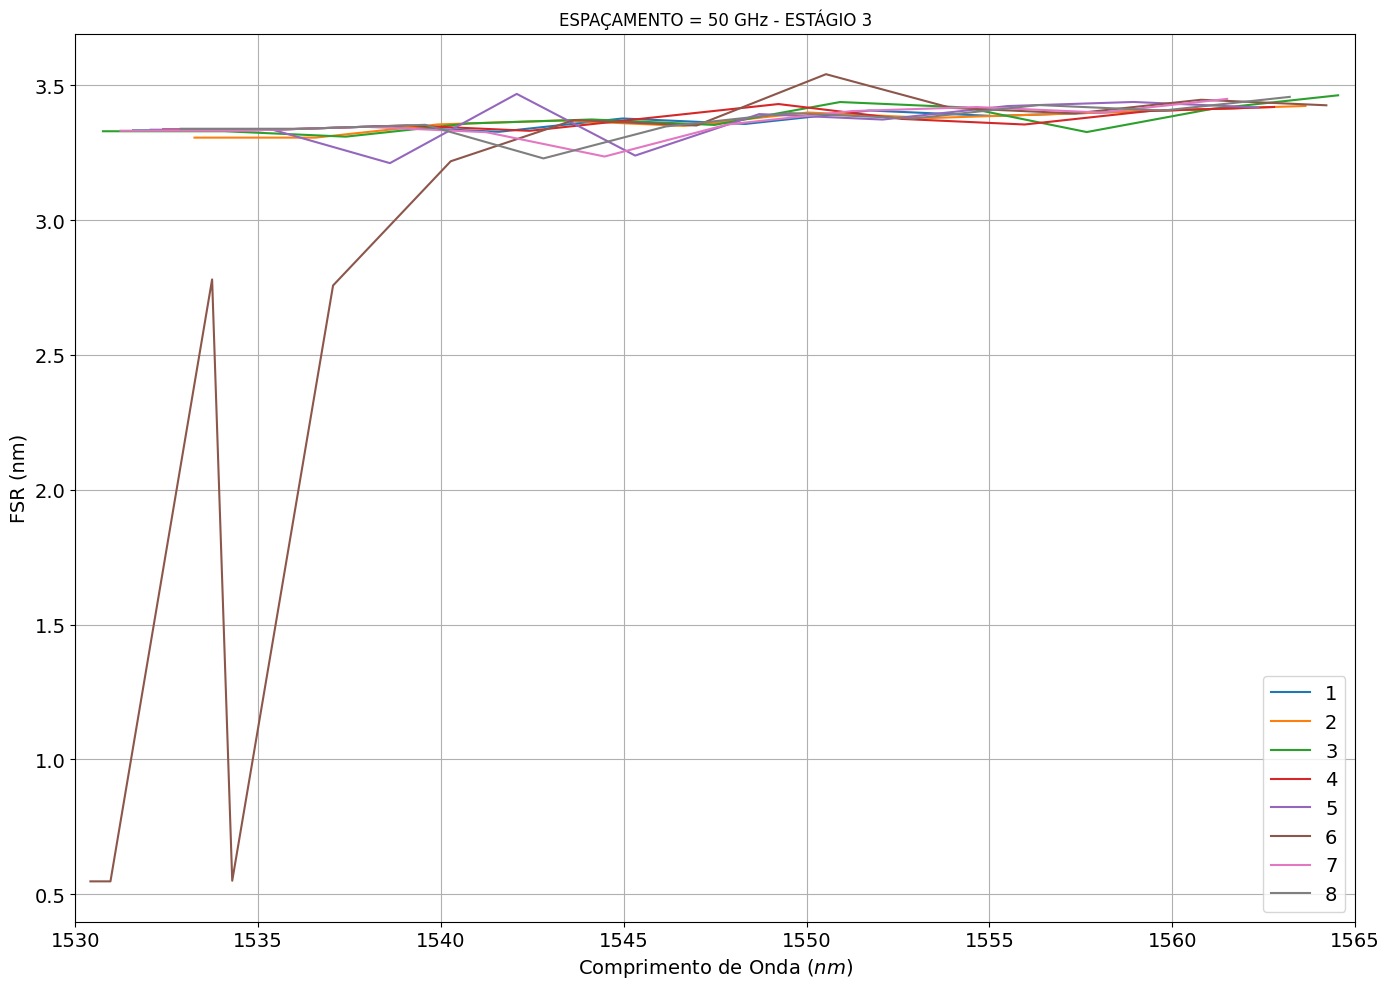

In [1960]:
plt.figure(figsize=(14,10))

for i in range((2**(1+estagio))):
    plt.plot(fsr_wv[i]*1e9,FSR[i]*1e9, label = f'{i+1}')
plt.xlabel('Comprimento de Onda $(nm)$', fontsize = 14)
plt.ylabel('FSR (nm)', fontsize = 14)
plt.title(f"ESPAÇAMENTO = {F} GHz - ESTÁGIO {ESTAGIO[estagio]}")

plt.tick_params(axis='both', labelsize=14)

plt.xlim(lamb_ini,lamb_fin)

plt.legend(loc = "best", fontsize = 14)

plt.grid(True)
plt.tight_layout()

plt.savefig(f'C:/Users/gson5/Downloads/Photonics-API-lumapi/LAB. 12 - CWDM/RESULTADOS 2/FSR - ESPAÇAMENTO {F} GHz ESTÁGIO {ESTAGIO[estagio]} - CASO {CASO} - FILTROS DE {ordem} ORDEM,png')
plt.show()

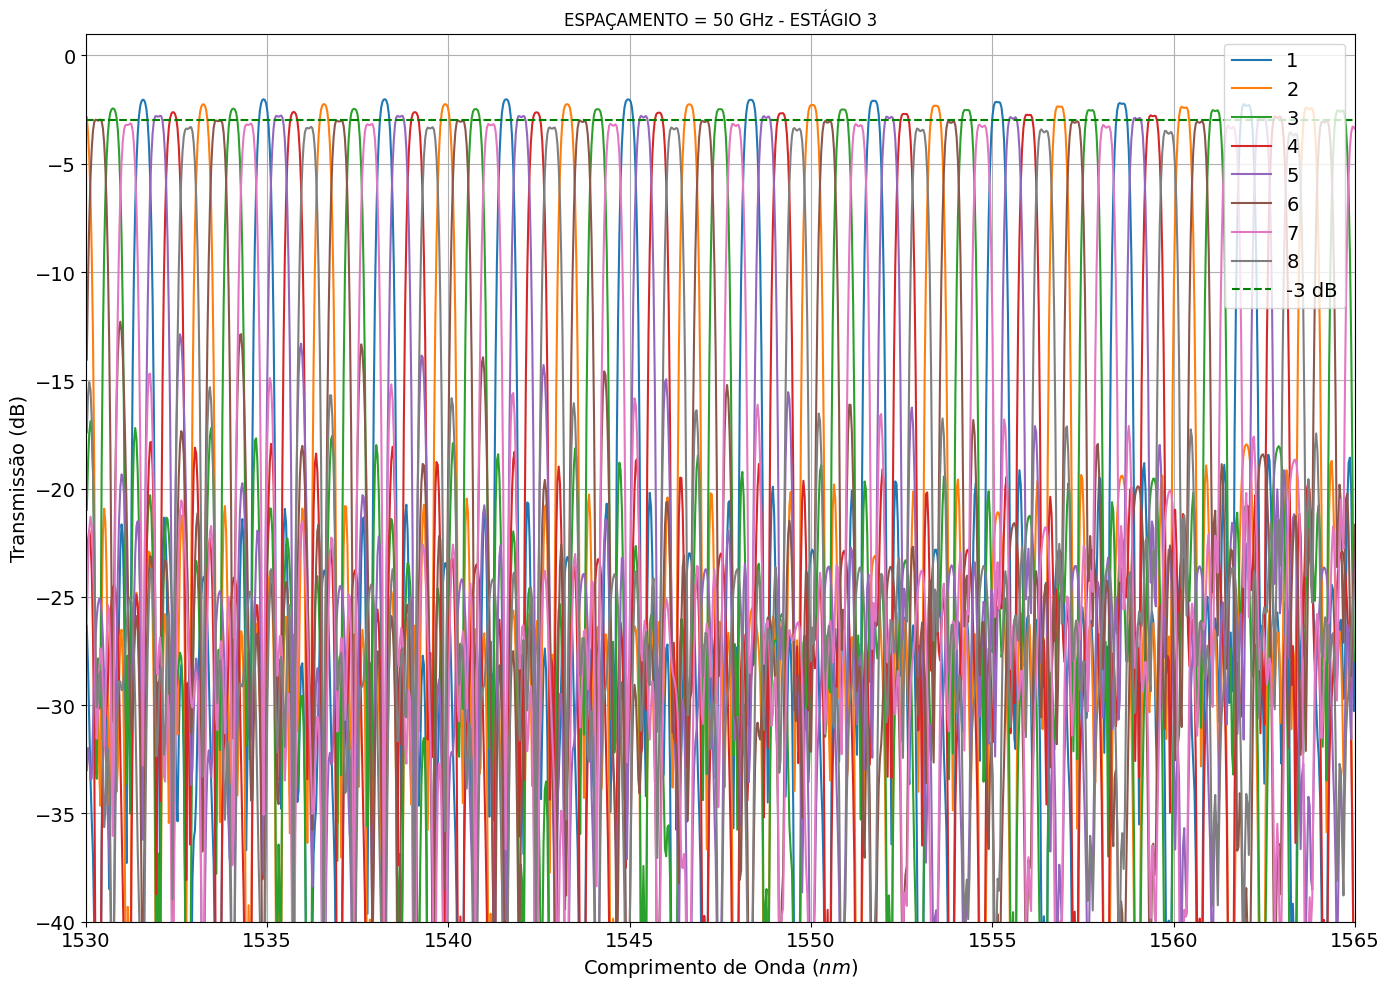

In [1961]:

plt.figure(figsize=(14,10))

for i in range((2**(1+estagio))):
    plt.plot(comprimentos_de_onda[i]*1e9,TE_gain[i], label = f'{i+1}')
plt.xlabel('Comprimento de Onda $(nm)$', fontsize = 14)
plt.ylabel('Transmissão (dB)', fontsize = 14)
plt.title(f"ESPAÇAMENTO = {F} GHz - ESTÁGIO {ESTAGIO[estagio]}")

plt.axhline(y=-3, linestyle='--', color ="g",label = '-3 dB')

plt.tick_params(axis='both', labelsize=14)

plt.xlim(lamb_ini,lamb_fin)
plt.ylim(-40 ,1)

plt.legend(loc = "best", fontsize = 14)

plt.grid(True)
plt.tight_layout()

plt.savefig(f'C:/Users/gson5/Downloads/Photonics-API-lumapi/LAB. 12 - CWDM/RESULTADOS 2/TRANSMISSÃO - ESPAÇAMENTO {F} GHz ESTÁGIO {ESTAGIO[estagio]} - CASO {CASO} - FILTROS DE {ordem} ORDEM.png')
plt.show()

os.startfile(f'C:/Users/gson5/Downloads/Photonics-API-lumapi/LAB. 12 - CWDM/RESULTADOS 2/TRANSMISSÃO - ESPAÇAMENTO {F} GHz ESTÁGIO {ESTAGIO[estagio]} - CASO {CASO} - FILTROS DE {ordem} ORDEM.png')


In [1962]:
##inter.close()